<a href="https://colab.research.google.com/github/gammapasta/machineLearning/blob/main/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb#scrollTo=z-oQeMvC2NnY
k-최근접 이웃의 한계


In [1]:
import numpy as

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )



k최근접 이웃 회귀 알고리즘을 이용하여 데이터 세트를 훈련한 모델을 만들고 농어의 길이가 50일때 무게를 예측한다   시험

- 데이터 전처리(자동) -> input과 target, 랜덤으로
- 만들기

In [2]:
from sklearn.model_selection import train_test_split

#1. 데이터 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input)
print(test_input)

#2. input을 2차원 배열로
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input)
print(test_input)

#3. 훈련하기
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]
[1033.33333333]


길이가 길어질수록 무게가 늘어나야하는데 음....  

산점도를 이용해 최근접 표현

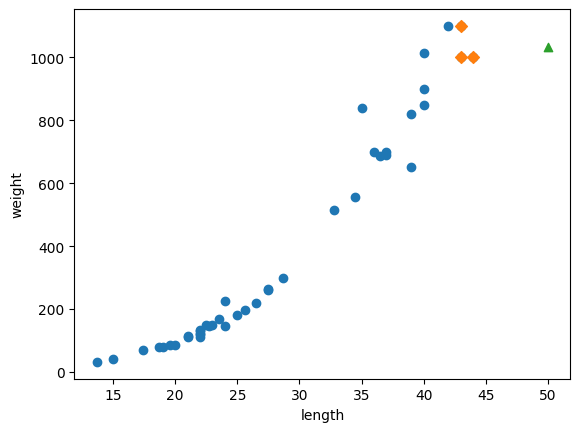

In [3]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

50과 가까운게 주황색들임
길이가 길어지면 농어의 무게가 증가
최근접 알고리즘이라 50과 가까운것을 예측함
그래서

In [4]:
print(np.mean(train_target[indexes]))

#100cm  예측
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


해결하려면 k회귀알고리즘으로는 100의 경우도 100 주변의 데이터가 필요  
- 선형회귀모델 !!!!! 중요 딥러닝떄 쓰임
- 트성이 1개인경우 잘 나타네는 직선을 학습

In [5]:
from sklearn.linear_model import LinearRegression
#객체생성
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


그래프 그리기  
하나의 직선을 그리려면 기울기와 절편 알아야함  
f(x) = ax + b  
사이킷런은 최소제곱법을 선형회귀에 사용  
  
print(lr.coef_, lr.intercept_)  
기울기, 절편이 저장됨

In [6]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


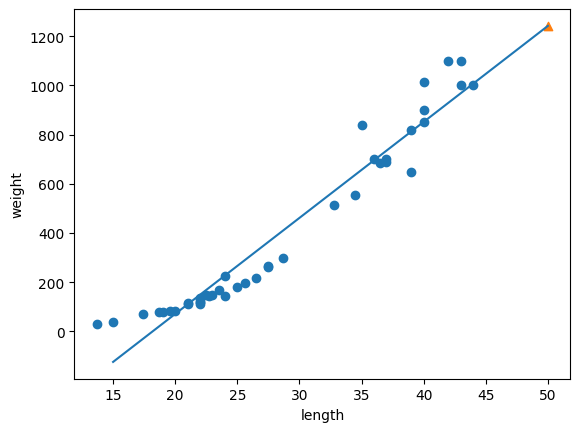

In [7]:


# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# X * 기울기 + 절편

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
x_bar = train_input.mean()
y_bar = test_target.mean()
a = ((train_input - x_bar).reshape(-1, ) * (train_target - y_bar)).sum() / ((train_input - x_bar)**2).sum()
b = y_bar - a * x_bar

print(b)


-783.3948354297381


모델파라미터 알아야함!!!!  
coed_ 와 interceot같이 머신러닝 알고리즘이 찾은 값

모델기반 학습
훈련 과정이 최적의 모델 파라미터를 찾는것  -> 선형회귀
  
사례기반 학습  
훈련과정이 훈련세트 저장하는 것이 전부 -> k최근접 이웃


과대적합인지 확인 -> R^2

In [9]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


테스트세트 점수가 낮음 과대적합??

훈련세트 점수도 높지 않아서 과소적합

그래프 문제 -> 무게가 마이너스가 될 수 있어서  
곡선 찾기  

2차방정식 -> 제곱한 항이 필요하다  
a*길이^2  
  
   
   numpy.colum_stack()


In [10]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_input.shape, test_input.shape)
print(train_poly.shape, test_poly.shape)

(42, 1) (14, 1)
(42, 2) (14, 2)


In [11]:
#다시 훈련하기

lr = LinearRegression()
lr.fit(train_poly, train_target)

#2차원배열, 특성2개 (길이제곱, 길이)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


2차원 방식도 선형회귀인가???  
- 1.01 길제곱 - 21 길이 + 116  


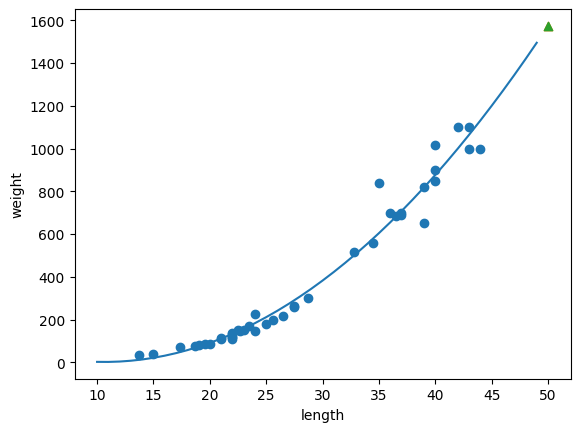

In [23]:
point = np.arange(10, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.plot(point,     lr.coef_[0]*point**2  +  lr.coef_[1]*point  +  lr.intercept_)

aa = 50
# 50cm 농어 데이터
plt.scatter([50],    lr.predict([[50**2, 50]]),   marker='^')
plt.scatter(aa,    lr.predict([[aa**2, aa]]),   marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


과소적합 -> 복자반 모델 필요